In [3]:
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
import cv2
import random
import os
from sklearn import metrics
os.environ['KMP_DUPLICATE_LIB_OK']='True'

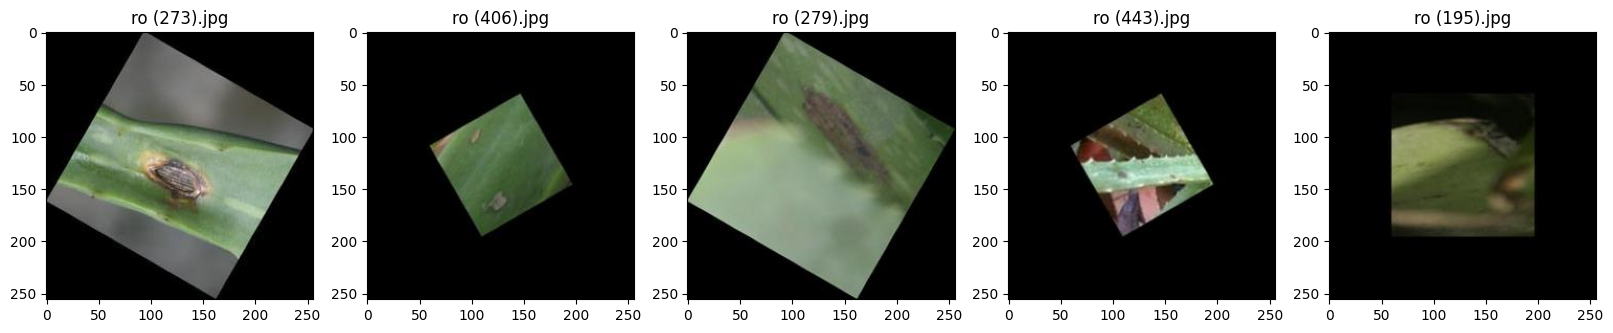

In [4]:
plt.figure(figsize=(20,20))
test_folder=r'C:\Users\adith\Documents\Aloe_Vara_leaf_classification\aloe_vera\0'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [5]:
IMG_WIDTH=255
IMG_HEIGHT=255
img_folder=r'C:\Users\adith\Documents\Aloe_Vara_leaf_classification\aloe_vera'

In [6]:
classes = ["Infected","Healthy"]
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [7]:
def create_dataset(img_folder):
    img_data_array=[]
    class_name=[]
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name

In [8]:
X_train, y_train =create_dataset(r'C:\Users\adith\Documents\Aloe_Vara_leaf_classification\aloe_vera')
X_test, y_test =create_dataset(r'C:\Users\adith\Documents\Aloe_Vara_leaf_classification\aloe_vera_test')

In [9]:
X_train = np.array(X_train)
y_train = np.array(y_train)
y_train = y_train.reshape(-1,)
y_train = y_train.astype(np.int64)
X_train.shape

(824, 255, 255, 3)

In [10]:
nsamples, nx, ny, nrgb = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny*nrgb))
X_train.shape

(824, 195075)

In [11]:
X_test = np.array(X_test)
y_test = np.array(y_test)
y_test = y_test.reshape(-1,)
y_test = y_test.astype(np.int64)

In [12]:
nsamples, nx, ny, nrgb = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny*nrgb))

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
model=RandomForestClassifier()

In [15]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [16]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [17]:
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.69      0.81       159
           1       0.53      0.97      0.68        58

    accuracy                           0.76       217
   macro avg       0.76      0.83      0.75       217
weighted avg       0.86      0.76      0.77       217



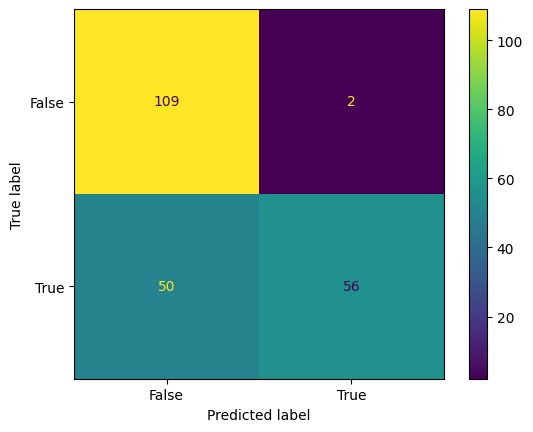

In [18]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuracy:",accuracy_score(y_pred,y_test))

Accuracy: 0.7603686635944701
